In [1]:
import argparse
import time
import msgpack
from enum import Enum, auto


import numpy as np

from graph_planning_utils import Sampler, a_star, heuristic, create_grid, create_graph, load_csv
import matplotlib.pyplot as plt
from udacidrone.frame_utils import global_to_local, local_to_global


%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

## Step 0: Load Data

In [3]:
# Set number of samples and K value for Sampling and K-D tree
N_SAMPLE = 300
k = 12

In [4]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)

nmin = np.min(data[:, 0])
emin = np.min(data[:, 1])

In [5]:
# The simulator uses local map,
# for easy searching in grid map,
# set the function to simply convert

def local2grid(p):
    return(p[0]-nmin, p[1]-emin, p[2])

def grid2local(grid_p):
    return(grid_p[0]+nmin, grid_p[1]+emin, grid_p[2])

In [6]:
# Grid points

grid_start = (317, 445, 0)
grid_goal = (620, 800, 5)

In [7]:
# Local points

start = grid2local(grid_start)
goal = grid2local(grid_goal)
print(start, goal)

(6.761099999999999, 5.768500000000017, 0) (309.7611, 360.7685, 5)


## Step 1. Sampling

In [8]:
sampler = Sampler(data, start, goal)

In [9]:
polygons = sampler._polygons
nodes = sampler.circular_random(N_SAMPLE)
print(len(nodes))

186


In [10]:
grid, north_offset, east_offset = create_grid(data, sampler._zmax, 1)

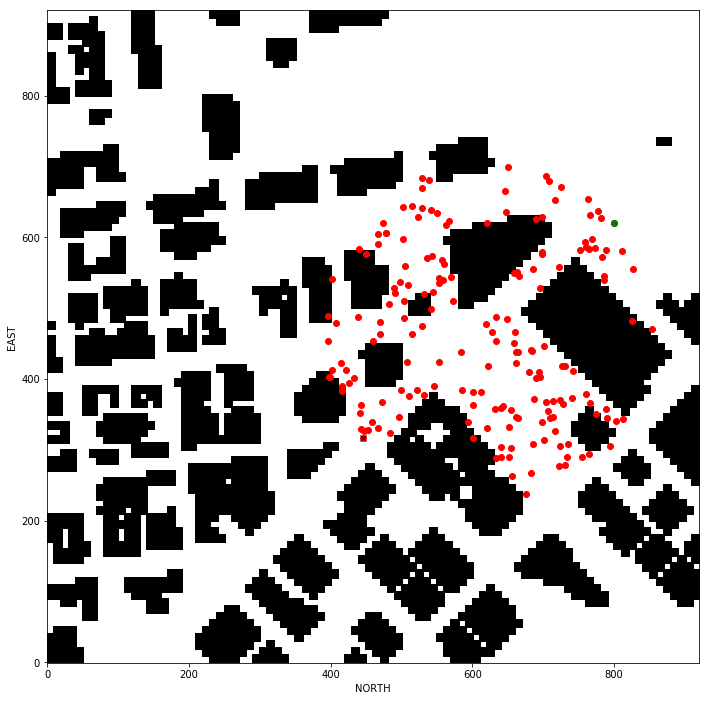

In [11]:
fig = plt.figure()

plt.imshow(grid, cmap='Greys', origin='lower')

# draw all nodes
for n1 in nodes:
    plt.scatter(n1[1] - emin, n1[0] - nmin, c='red')
    
plt.plot(start[1]-emin, start[0]-nmin, 'x', c='black')
plt.plot(goal[1]-emin, goal[0]-nmin, 'o', c='green')
    
plt.xlabel('NORTH')
plt.ylabel('EAST')

plt.show()

## Step 2. Create Graph by K-D trees

In [12]:
g = create_graph(nodes, k, polygons)
print("Number of edges", len(g.edges))

Connecting 11 node
Connecting 21 node
Connecting 31 node
Connecting 41 node
Connecting 51 node
Connecting 61 node
Connecting 71 node
Connecting 81 node
Connecting 91 node
Connecting 101 node
Connecting 111 node
Connecting 121 node
Connecting 131 node
Connecting 141 node
Connecting 151 node
Connecting 161 node
Connecting 171 node
Connecting 181 node
Number of edges 901


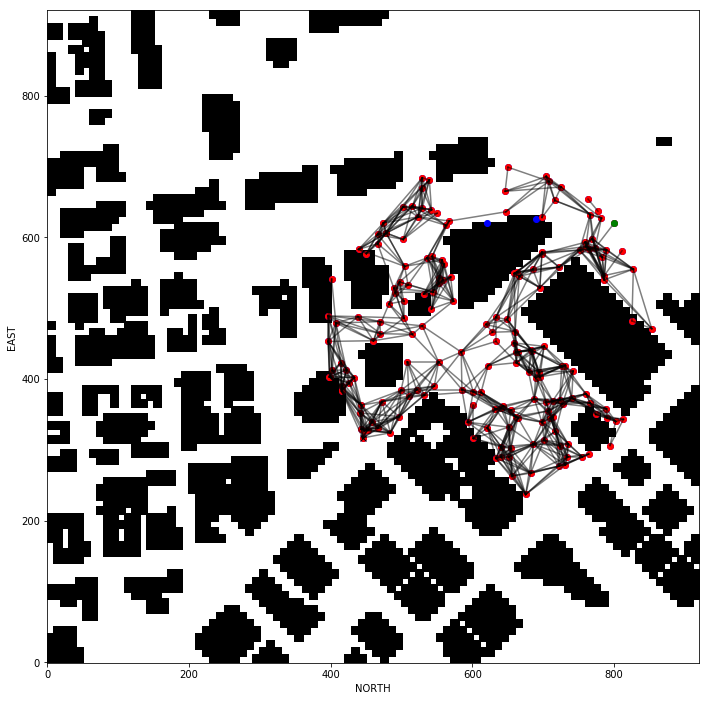

In [13]:
fig = plt.figure()

plt.imshow(grid, cmap='Greys', origin='lower')

# draw edges
for (n1, n2) in g.edges:
    plt.plot([n1[1] - emin, n2[1] - emin], [n1[0] - nmin, n2[0] - nmin], 'black' , alpha=0.5)

# draw all nodes
for n1 in nodes:
    plt.scatter(n1[1] - emin, n1[0] - nmin, c='blue')
    
# draw connected nodes
for n1 in g.nodes:
    plt.scatter(n1[1] - emin, n1[0] - nmin, c='red')
    
    
plt.plot(start[1]-emin, start[0]-nmin, 'x', c='black')
plt.plot(goal[1]-emin, goal[0]-nmin, 'o', c='green')

plt.xlabel('NORTH')
plt.ylabel('EAST')

plt.show()

## Step 4. Calculate path using A*

In [15]:
path, _ = a_star(g, heuristic, start, goal)
print(le)

Hi, I'm working on the 10 loop.
Hi, I'm working on the 20 loop.
Hi, I'm working on the 30 loop.
Hi, I'm working on the 40 loop.
Hi, I'm working on the 50 loop.
Hi, I'm working on the 60 loop.
Found a path.


In [14]:
path_pairs = zip(path[:-1], path[1:])

fig = plt.figure()

plt.imshow(grid, cmap='Greys', origin='lower')

# draw nodes
for n1 in g.nodes:
    plt.scatter(n1[1] - emin, n1[0] - nmin, c='red')
    
# draw edges
for (n1, n2) in g.edges:
    plt.plot([n1[1] - emin, n2[1] - emin], [n1[0] - nmin, n2[0] - nmin], 'gray')
    
# TODO: add code to visualize the path
path_pairs = zip(path[:-1], path[1:])
for (n1, n2) in path_pairs:
    plt.plot([n1[1] - emin, n2[1] - emin], [n1[0] - nmin, n2[0] - nmin], 'green')

    
plt.plot(start[1]-emin, start[0]-nmin, 'x', c='black')
plt.plot(goal[1]-emin, goal[0]-nmin, 'o', c='green')

plt.xlabel('NORTH')
plt.ylabel('EAST')

plt.show()

NameError: name 'path' is not defined

[Implementation Demo](./Graph_Motion_Planning_Demo.ipynb)

### An example of how to convert local points and GPS points 

In [ ]:
## Add start and goal point
lat0, lon0 = 37.792480, -122.397450
global_home = (lon0, lat0)
start_position = (grid_start[0]+north_offset, grid_start[1]+east_offset, grid_start[2])
goal_position = (grid_goal[0]+north_offset, grid_goal[1]+east_offset, grid_goal[2])
global_start = local_to_global(start_position, global_home)
global_goal = local_to_global(goal_position, global_home)

print('Global Start: ', global_start)
print('Global Goal: ', global_goal)